<div class="head0">
    <div class="head0__name">
        Equation with zero drift in 3D case
    </div>
    <div class="head0__note">
        Solution of the 3D Fokker-Planck equation with zero drift (and known analytic solution) by fast and accurate tensor based method (TT-format) and in standard numpy format.
    </div>
</div>
<div class="note">
    Since interpolation is not required for the case of the zero drift ($f \equiv 0$), but our solver calculates it by design, then it is expected to operate much slower than another simple solvers.
</div>

In [1]:
import sys

import numpy as np

sys.path.extend(['./../lib', './../helpers'])
from solver import Solver
from solvers_check import SolversCheck
from helpers import init_jupyter

data_path = './data/eq-3d_drift-zero_analyt'
init_jupyter()

Start |  3:38PM MSK on Sep 10, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Model problem
    </div>
</div>

Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv 0.2 I
    \implies
    D(x, t) \equiv 0.02 I,
$$
and
$$
    d = 3,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{(2 \pi s)^{\frac{3}{2}}}\exp{\left[-\frac{|x|^2}{2s}\right]}.
$$

It can be shown that the analytic solution is
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                (2 \pi s + 4 \pi D t)^{\frac{3}{2}}
            }
        \exp{ \left[
            - \frac
                {
                    |x|^2
                }
                {
                    2  s + 4 D t
                }
        \right] },
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) = 0.
$$

In [2]:
def func_f0(x, t):
    return np.zeros(x.shape)

def func_f1(x, t):
    return np.zeros(x.shape)

def func_r0(x):
    a = 2. * s_coef
    r = np.exp(-np.sum(x*x, axis=0) / a) / (np.pi * a)**1.5
    return r.reshape(-1)

def func_rt(x, t):
    a = 2. * s_coef + 4. * D_coef * t
    r = np.exp(-np.sum(x*x, axis=0) / a) / (np.pi * a)**1.5
    return r.reshape(-1)

def func_rs(x):
    r = np.zeros(x.shape[1])
    return r.reshape(-1)

<div class="head1">
    <div class="head1__name">
        Parameters
    </div>
</div>

In [5]:
s_coef = 1.
D_coef = 0.5
t_min, t_max, t_poi = +0., +0.01, 1000
x_min, x_max, x_poi = -3., +3., 15

<div class="head1">
    <div class="head1__name">
        Solution of the equation
    </div>
</div>

In [18]:
SL = Solver(d=3)
SL.set_grid_t(t_poi, t_min, t_max, t_hst=10)
SL.set_grid_x(x_poi, x_min, x_max)
SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
SL.set_coefs(D_coef)

SL.prep()
SL.calc()
SL.info()

Solve: 100%|█| 99/99 [00:12<00:00,  7.58step/s, | At T=1.0e-02 : e=9.7e-01 es=5.0e-03]

----------- Solver
Format    : 3D, NP [order=2]
Grid x    : poi =        11, min =   -5.0000, max =    5.0000
Grid t    : poi =       100, min =    0.0000, max =    0.0100 , hst =        10
Time sec  : prep = 1.43e-01, calc = 1.12e+01, spec = 1.57e+09
Err calc  : 9.69e-01 (at the point: 9.86e-01)
Err stat  : 5.00e-03 (at the point: 7.75e-04)


<div class="head1">
    <div class="head1__name">
        Visualization of the solution
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Solution near boundaries
    </div>
</div>

--- Solution at spatial point
X = [-5.0e+00, -5.0e+00, -5.0e+00]


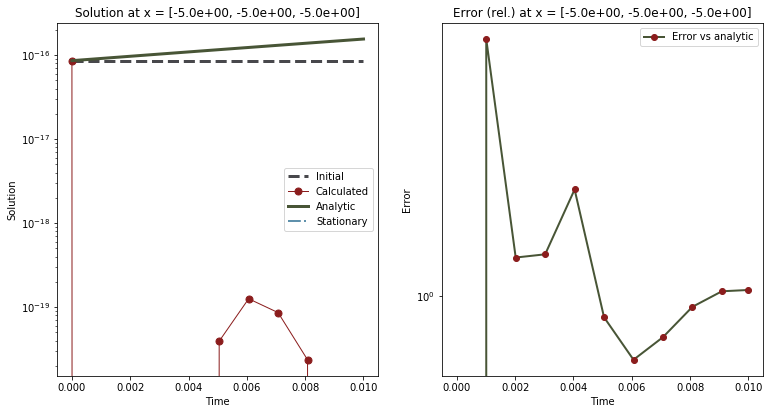

--- Solution at spatial point
X = [ 5.0e+00,  5.0e+00,  5.0e+00]


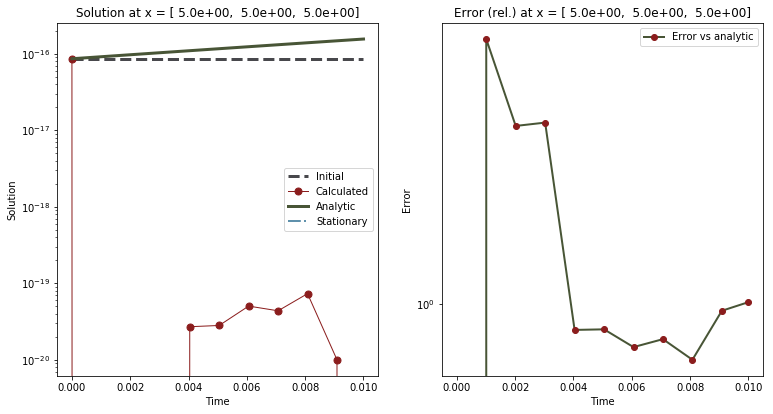

In [19]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_t([x_min]*3, opts)
SL.plot_t([x_max]*3, opts)

<div class="head2">
    <div class="head2__name">
        Solution in the inner points
    </div>
</div>

--- Solution at spatial point
X = [-1.5e+00, -1.5e+00, -1.5e+00]


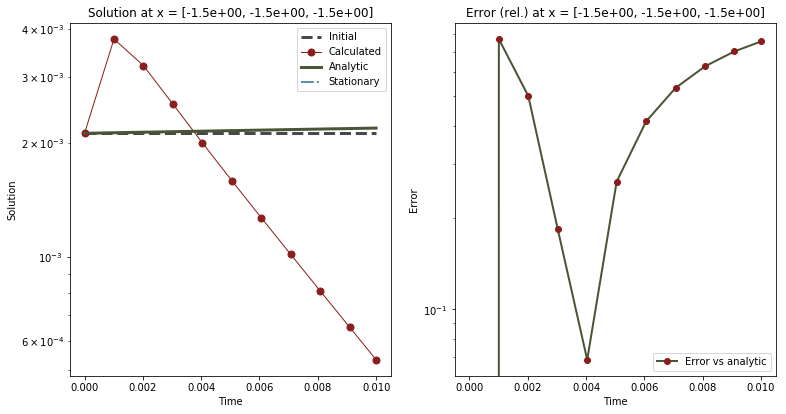

--- Solution at spatial point
X = [ 3.1e-16,  3.1e-16,  3.1e-16]


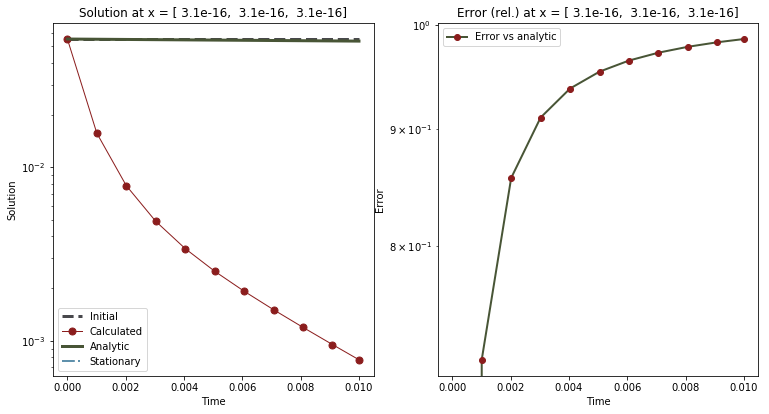

--- Solution at spatial point
X = [ 1.5e+00,  1.5e+00,  1.5e+00]


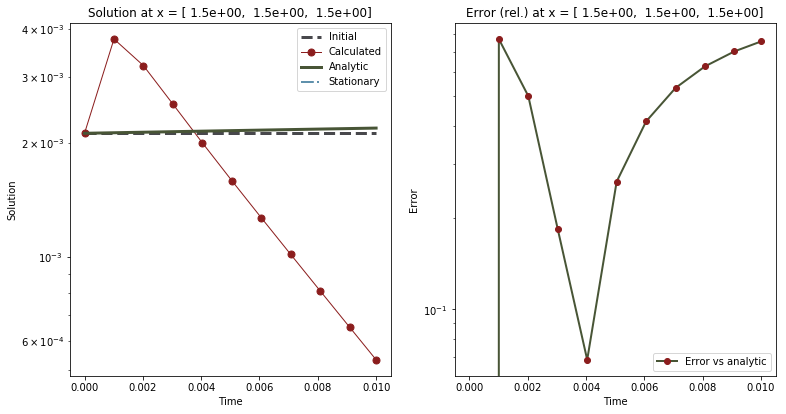

In [20]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_t([-1.5]*3, opts)
SL.plot_t([+0.0]*3, opts)
SL.plot_t([+1.5]*3, opts)

<div class="head2">
    <div class="head2__name">
        Solution for different time steps
    </div>
    <div class="head2__note">
        Solution is very accurate.
    </div>
</div>

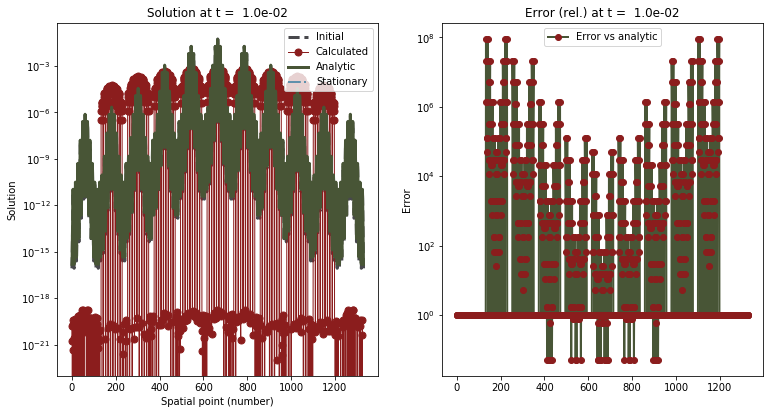

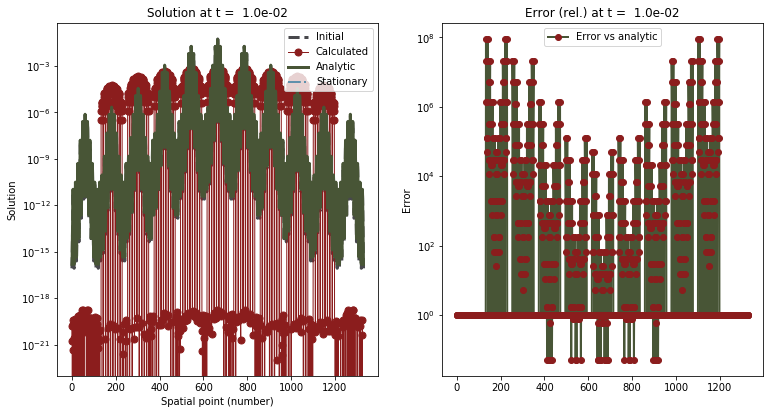

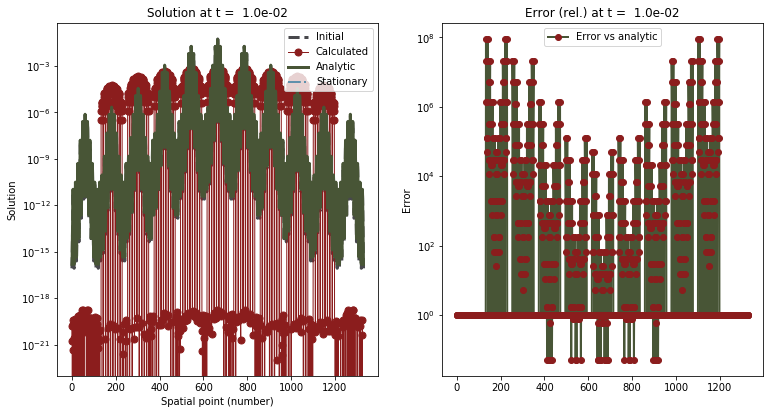

In [21]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_x(+0.1, opts)
SL.plot_x(+0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see computations code at the end of this file).
    </div>
</div>

In [ ]:
SLC = SolversCheck(data_path)
SLC.load()

name1 = 'Solver-NP'
name2 = 'Solver-TT'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, n=n, is_stat=False, is_xpoi=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, m=m, is_stat=False, is_xpoi=False, lims={ 'all': [1, 6] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver type
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solver and TT-solver.
    </div>
</div>

In [ ]:
SLC.plot_all(n=n, is_stat=False, is_xpoi=False)

In [ ]:
SLC.plot_all(m=m, is_stat=False, is_xpoi=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [7]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [8]:
d = 3
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [9]:
def show_x(X, r_calc, _time):
    X = X.reshape(d, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)
    X = np.arange(X.shape[1])
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X, r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X, r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X, r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('Point number')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

    err = np.abs(r_real - r_calc) / np.abs(r_real)
    plt.plot(
        X, err, label='Analytic',
        linewidth=3, color='black'
    )
    plt.semilogy()
    plt.title('Solution error at the final time step')
    plt.xlabel('Point number')
    
    plt.show()
        
    print('Number of spatial points : %8d^%d'%(x_poi, d))
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the forward Euler scheme
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using standard forward Euler scheme
$$
    r_{k+1} = r_{k} + h D r_{k},
    \quad
    k = 0, 1, \ldots, m-1,
$$
where
$$
    D =
        D_0 \otimes I   \otimes I +
        I   \otimes D_0 \otimes I +
        I   \otimes I   \otimes D_0,
$$
$$
    D_0 = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right).
$$

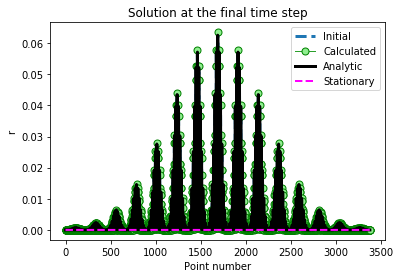

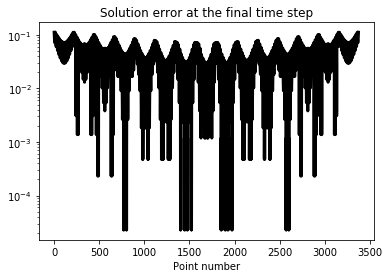

Number of spatial points :       15^3
Number of time points    :     1000
Error (relative norm)    : 9.36e-03    
Total time (sec)         : 5.81e+00    


In [10]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)
X = [X.copy() for _ in range(d)]
X = np.meshgrid(*X, indexing='ij')
X = np.array(X).reshape((d, -1), order='F')
    
D0 = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D0 = D0 * D_coef / l / l

J0 = np.eye(n); J0[0, 0] = 0.; J0[-1, -1] = 0.   

Z0 = h**(1./d) * J0 @ D0 @ J0

Z = np.kron(Z0, np.kron(Z0, Z0))

r = func_r0(X)
for t in T[1:]:
    r = r + Z @ r

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Chebyshev spatial grid and the matrix exponential
    </div>
</div>

We can solve equation on the Chebyshev spatial grid for the time $t > 0$ using matrix exponential and the 2th order Chebyshev differentiation matrix
$$
    u_{t} = e^{t \cdot D_{coef} \cdot D} u_{0},
$$
where $u_{0}(x)$ is the known initial condition and diffusion matrix is defined as above.

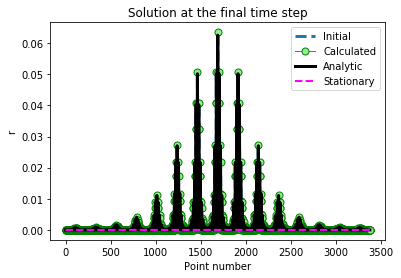

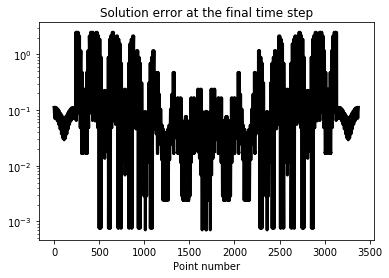

Number of spatial points :       15^3
Number of time points    :     1000
Error (relative norm)    : 9.41e-03    
Total time (sec)         : 2.50e+01    


In [11]:
_time = time.time()

IT = Intertrain(n=[x_poi, x_poi, x_poi], l=[[x_min, x_max], [x_min, x_max], [x_min, x_max]])

X = IT.grid()

D0 = D_coef * IT.dif2()

J0 = np.eye(n); J0[0, 0] = 0.; J0[-1, -1] = 0.   

Z0 = J0 @ D0 @ J0

Z = np.kron(Z0, np.kron(Z0, Z0))
Z = expm((t_max - t_min) * Z)

r = func_r0(X)
r = Z @ r

show_x(X, r, time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Multiple computations
    </div>
    <div class="head1__note">
        We compute dependencies of solution accuracy and calculation time on the number of time and spacial points and solver type. Results are saved to file and may be reused later for visualization.  
    </div>
</div>

In [ ]:
if False: # Protection of already saved data
    SLC = SolversCheck(data_path)
    SLC.set_grid_t(t_min, t_max)
    SLC.set_grid_x(x_min, x_max)
    SLC.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SLC.set_coefs(D_coef)

    M = [10, 100, 1000, 10000, 100000]
    N = list(np.arange(10, 21, 5, dtype=int))
    SLC.add(name='Solver-NP', d=3, eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

    M = [10, 100, 1000, 10000, 100000]
    N = list(np.arange(10, 51, 5, dtype=int))
    SLC.add(name='Solver-TT', d=3, eps=1.E-6, ord=2, with_tt=True, M=M, N=N)

    SLC.calc()
    SLC.save()

<div class="end"></div>